<div align='center' style='font-size:100%'>Numerical Simulation of Computational Models with</div>
<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tell-roadrunner.png" width="75%"></div>
<div align='center' style='font-size:75%'>
Veronica L. Porubsky, BS
<div align='center' style='font-size:75%'>Sauro Lab PhD Student, Department of Bioengineering<br>
Seminar Coordinator, <a href="https://reproduciblebiomodels.org/dissemination-and-training/seminar/">Center for Reproducible Biomedical Modeling</a><br>
University of Washington, Seattle, WA USA
</div>
<hr>

Note: the layout of this Jupyter notebook is optimized for a <a href="https://rise.readthedocs.io/en/maint-5.5/">RISE slideshow</a><br>

# Primary developers
<br>
<br>
<br>
<div align='left'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/acknowledgements1.png" width="75%"></div>

# Links to relevant resources:

<a href="https://github.com/sys-bio/tellurium#installation-instructions">Tellurium installation instructions</a><br>
<a href="https://tellurium.readthedocs.io/en/latest/">Tellurium documentation</a><br>
<a href="https://libroadrunner.readthedocs.io/en/latest/">libRoadRunner documentation</a><br>
<a href="https://nanohub.org/resources/tellurium">Tellurium environment on nanoHUB</a><br>

# What is kinetic modeling?

<ul>
  <li>Chemical kinetics studies the factors that influence the rate of chemical reactions</li>
     <ul class="square">
      <li>e.g. concentration, temperature, light, catalysts, etc. </li>
     </ul>
  <li>Chemical reaction networks are the framework for building all types of dynamical models</li>
        <ul class="square">
          <li>Genetic circuits</li>
          <li>Cell signaling pathways</li>
          <li>Metabolic networks</li>
        </ul>
  <li>Types of kinetic models:</li>
    <ul class="square">
      <li>Agent-based</li>
      <li>Algebraic</li>
      <li>Boolean</li>
      <li>Constraint based</li>
      <li>Differential equations</li>
      <li>Statistical and machine learning methods</li>
      <li>Stochastic</li>
    </ul>
</ul>

# How does numerical simulation help us model kinetics?

<ul>
  <li>Provides a method to approximate analytical solutions for complex (often non-linear) systems</li>
  <li>Kinetic laws describe the rates of change of species in the system, which can be modeled mathematically</li>
  <li>For a sufficiently large network, simulators must be efficient and perform rapid numerical integration</li>
</ul>


# What are differential equations models?

<ul class="roman">
 <li>Models which describe how variables in a system evolve over time</li>
 <ul class="square">
  <li>e.g. floating species concentrations</li>
 </ul>
 <li>Quantities are derived from the variables</li>
  <ul class="square">
  <li>e.g. pathway flux</li>
 </ul>
 <li>Some parameters of the model are fixed by the modeler</li>
   <ul class="square">
  <li>e.g. rate constants</li>
  <li>e.g. enzyme concentrations</li>
  <li>e.g. boundary species concentrations</li>
 </ul>
 <li>Deterministic differential equations models are useful when we can assume there are a large number of participants in the chemical reactions</li>
 <li>Stochastic models are useful for dilute systems in which reactions may not occur at every timepoint</li>
</ul>

# Tellurium and libRoadRunner support rapid simulation and analysis of kinetic models

<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-utilities.png" width="75%"></div>

# Time to start modeling!

# Importing relevant packages:

In [311]:
import tellurium as te # Python-based modeling environment for kinetic models
import roadrunner as rr # High-performance simulation and analysis library
import numpy as np # Scientific computing package
import random # Generate random numbers
import matplotlib.pylab as plt # Additional Python plotting utilities


# Writing a simple model in the Antimony language


<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/simple-antimony.png" width="75%"></div>

In [312]:
Ant_str = """
model test               # name the model
    compartment C1;      # specify compartments
    C1 = 1.0;            # assign compartment volume
    species S1, S2;

    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;
    S1 in C1; S2 in C1;  # allocate species to appropriate compartment
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;

    k1 = 1.0;            # assign constant values to global parameters
end
"""

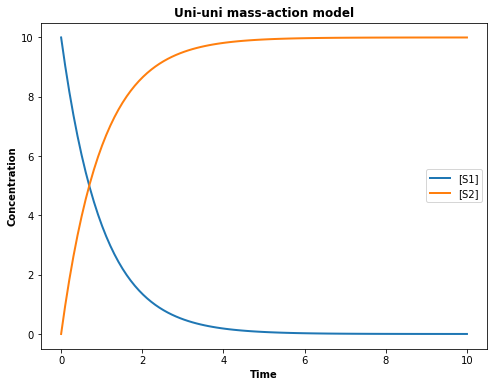

In [313]:
r = te.loada(Ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 



# Adding events to an Antimony string

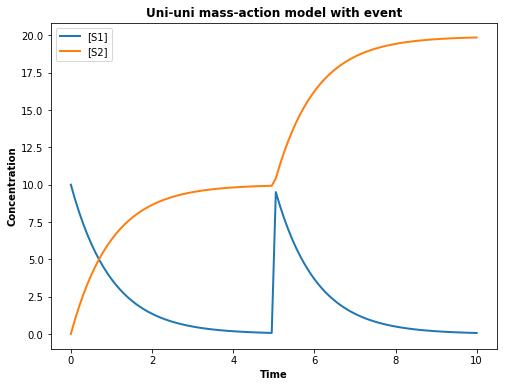

In [314]:
Ant_str = """
model test               # name the model
    compartment C1;      # specify compartments
    C1 = 1.0;            # assign compartment volume
    species S1, S2;

    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;
    S1 in C1; S2 in C1;  # allocate species to appropriate compartment
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;

    k1 = 1.0;            # assign constant values to global parameters
    
    E1: at (time > 5): S1 = 10; # add an event - spike in S1
end
"""
r = te.loada(Ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model with event', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 



In [ ]:
ant_str = """
model test               # name the model
    compartment C1;      # specify compartments
    C1 = 1.0;            # assign compartment volume
    species S1, S2;

    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;
    S1 in C1; S2 in C1;  # allocate species to appropriate compartment
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;

    k1 = 1.0;            # assign constant values to global parameters
    
    E1: at (S1 < 0.005): S1 = 10; # add an event - spike in S1
end
"""
r = te.loada(ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model with event', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 



# Stochastic simulation with Gillespie algorithm


In [ ]:
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 40')
r.integrator = 'gillespie'
r.integrator.seed = 1234 # Can set the seed value for the random number generator to obtain a deterministic distribution

multi_run_result = []
for k in range(1, 50):
    r.reset()
    result = r.simulate(0, 40)
    multi_run_result.append(result)
    te.plotArray(result, show=False, alpha=0.6) # setting alpha value changes trajectory opacity
te.show()

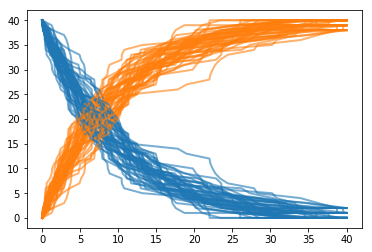

In [290]:
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 40')
# if a seed value is not set, each run will return slightly different results that approximate the same distribution

results = []
for k in range(1, 50):
    r.reset()
    s = r.gillespie(0, 40)
    results.append(s)
    te.plotArray(s, show=False, alpha=0.6)
te.show()

# Writing an Antimony model with interactions
<br>
Repressilator circuit from Elowitz & Liebler (2000):
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/repressilator.png" width="40%"></div>

In [ ]:
ant_str = """
// Compartments and Species:
species M1, P3, P1, M2, P2, M3;

// Reactions:
J0:  -> M1; a_m1*(Kr_P3^n1/(Kr_P3^n1 + P3^n1)) + leak1;
J1: M1 -> ; d_m1*M1;
J2:  -> P1; a_p1*M1;
J3: P1 -> ; d_p1*P1;
J4:  -> M2; a_m2*(Kr_P1^n2/(Kr_P1^n2 + P1^n2)) + leak2;
J5: M2 -> ; d_m2*M2;
J6:  -> P2; a_p2*M2;
J7: P2 -> ; d_p2*P2;
J8:  -> M3; a_m3*(Kr_P2^n3/(Kr_P2^n3 + P2^n3)) + leak3;
J9: M3 -> ; d_m3*M3;
J10:  -> P3; a_p3*M3;
J11: P3 -> ; d_p3*P3;

// Species initializations:
M1 = 2.03249447573567;
P3 = 7.5809668611914;
P1 = 7.32165894379353;
M2 = 1.31711279301053;
P2 = 2.49875382117871;
M3 = 8.25783133141464;

// Variable initializations:
a_m1 = 0.788266186959804;
Kr_P3 = 0.814775285390223;
n1 = 6.67056125568989;
leak1 = 0.160823871809731;
d_m1 = 3.33960526593243;
a_p1 = 3.97131795533734;
d_p1 = 0.683167309351405;
a_m2 = 9.99777500805325;
Kr_P1 = 0.674695295333568;
n2 = 3.75940824338219;
leak2 = 4.40965305734082e-07;
d_m2 = 3.69127808679613;
a_p2 = 8.77481400405659;
d_p2 = 2.93762312105978;
a_m3 = 9.48399601890087;
Kr_P2 = 3.24536057975687;
n3 = 2.61562411515969;
leak3 = 4.67591640677641e-15;
d_m3 = 0.330348948379899;
a_p3 = 0.545154747154472;
d_p3 = 2.41482917873538;

// Other declarations:
const a_m1, Kr_P3, n1, leak1, d_m1, a_p1, d_p1, a_m2, Kr_P1, n2, leak2, d_m2;
const a_p2, d_p2, a_m3, Kr_P2, n3, leak3, d_m3, a_p3, d_p3;
"""
repressilator_ant = te.loada(ant_str)
repressilator_ant.simulate(0, 30, 100)
repressilator_ant.plot()


# Human-readable Antimony string

In [ ]:
#%% repressilator model SBML
print(repressilator_ant.getCurrentSBML())


In [ ]:
#%% repressilator model Antimony string
print(repressilator_ant.getAntimony())

# Import and export capabilities with Tellurium

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/wolf_publication.PNG" width="65%"></div>

<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/wolf_network.PNG" width="65%"></div>

In [ ]:
#%% You can load an SBML model directly from the BioModels Database, given the BioModel ID
wolf = te.loadSBMLModel("http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000090")
wolf.simulate(0, 100, 1000)
wolf.plot(figsize = (10, 6), xtitle = 'Time', ytitle = 'Concentration')
 

In [ ]:
# Export the model you just accessed from BioModels to the current directory as an SBML string
wolf.reset()
wolf.getFloatingSpeciesConcentrationIds()
wolf.exportToAntimony('wolf.txt', current = True)
# wolf.exportToSBML('wolf.xml', current = True)

In [ ]:
wolf = te.loada('wolf.txt') # load the Antimony string you just saved to the working directory
wolf.simulate(0, 200, 1000)
wolf.plot(figsize = (15, 10), xtitle = 'Time', ytitle = 'Concentration')


# Useful matrices and vectors

In [ ]:
r = te.loada('S1 -> S2; k1*S1; k1 = 0.1; S1 = 40')

# The stoichiometry matrix
print(r.getFullStoichiometryMatrix())
# short-cut
print(r.sm())

In [ ]:
# The Jacobian matrix
print(r.getFullJacobian())
# short-cut
print(r.fjac())



In [ ]:
# reaction rate vector
print(r.getReactionRates())
# short-cut
print(r.rv())


In [ ]:
# the rate of change vector
print(r.getRatesOfChange())
# short-cut
print(r.dv())


In [ ]:
# the species concentration vector
print(r.getFloatingSpeciesConcentrations())
# short-cut
print(r.sv())

In [ ]:
# the names of all floating species
print(r.getFloatingSpeciesIds())
# short-cut
print(r.fs())

In [ ]:
# the names of all kinetic parameters in the model
print(r.getGlobalParameterIds())
# short-cut
print(r.ps())

# Advanced analysis with Tellurium

In [306]:
#%% Computing Steady State
r.reset()
r.steadyState() # Bring the model to steady state using a steady state solver
print(r.getFloatingSpeciesConcentrations())

# short-cut
print(r.sv())

[0.39130435]
[0.39130435]


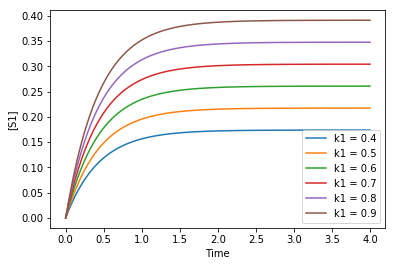

In [303]:
#%% Parameter scans and plotting -- example of flexibility with Python programming
r = te.loada('''
   J1: $X0 -> S1; k1*X0;
   J2: S1 -> $X1; k2*S1;
   
   X0 = 1.0; S1 = 0.0; X1 = 0.0;
   k1 = 0.4; k2 = 2.3;
''')

for k1 in np.arange(0.4, 1, 0.1):
    r.k1 = k1
    r.reset()
    result = r.simulate(0, 4, 100, ['time', 'S1'])
    plt.plot(result['time'], result['S1'], label = 'k1 = ' + format(k1, ".1f"))

plt.legend(loc = 'lower right')
plt.xlabel('Time'); plt.ylabel('[S1]')
plt.show()


# Changing integrator and steady state solver settings with libRoadRunner

In [ ]:
print(rr.integrators) # shows the integrators implemented in tellurium

# cvode 

In [ ]:
print(rr.steadyStateSolvers) # shows the steady state solvers currently implemented

In [302]:
print(r.getSteadyStateSolver()) # shows the settings for the steady state solver


< roadrunner.SteadyStateSolver() >
  name: nleq2
  settings:
     allow_presimulation: true
    presimulation_maximum_steps: 100
      presimulation_time: 100
            allow_approx: true
        approx_tolerance: 0.000001
    approx_maximum_steps: 10000
             approx_time: 10000
      relative_tolerance: 0.000000000001
      maximum_iterations: 100
         minimum_damping: 1e-20
          broyden_method: 0
               linearity: 3



In [310]:
r.steadyStateSolver.approx_maximum_steps = 12000 # change the settings for the steady state solver


# Acknowledgements
<br>
<div align='left'><img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/acknowledgements2.png" width="80%"></div>